<a href="https://colab.research.google.com/github/AlejoBaragano/Proyecto-Coderhouse/blob/main/TRABAJO_CAPITAL_HUMANO_DATA_SCIENCE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO SOBRE CAPITAL HUMANO 🦾
El proyecto se basará en un dataset del área de Capital o Recursos Humanos con información de 1470 personas de una gran empresa, abarcando muchos aspectos. A continuación, se detalla que representa cada columna:

Employee ID: ID de cada trabajador

Age: Edad

BusinessTravel: Frecuencia de viaje

Department: Departamento o área de trabajo

DistanceFromHome: Distancia entre la oficina o lugar de trabajo, y el hogar del trabajador

Education: Nivel de educación, comprendido entre 1 y 5

EducationField: Campo de estudio

EnvironmentSatisfaction: Que tan satisfecho está el empleador con la oficina, lugar o ambiente de trabajo

Gender: Genero

JobInvolvement: que tan involucrado se encuentra el trabajador con su empleo, comprendido entre 1 y 4

JobRole: Puesto de trabajo

JobSatisfaction: Que tan satisfecho está el trabajador con su empleo, entre 1 y 4

MaritalStatus: Estado civil

MonthlyIncome: Salario mensual

NumCompaniesWorked: Cantidad de empresas en las que trabajó antes de hacerlo en la actual

OverTime: Si realiza horas extras

PerformanceRating: Que tan bien se desenvulve el trabajador en su empleo, entre 1 y 4

RelationshipSatisfaction: Que tan buena es la relación con el resto de sus compañeros, entre 1 y 4

TotalWorkingYears: Cantidad de años trabajados, tanto dentro como fuera de la empresa

WorkLifeBalance: Balance que mide la relación y equilibrio entre la vida privada y el trabajo, entre 1 y 4

YearsAtCompany: Cantidad de años trabajados en la empresa

YearsInCurrentRole: Cantidad de años trabajados en el mismo rol, dentro de la empresa

YearsWithCurrManager: Cantidad de años trabajados con el mismo supervisor, jefe o superior

La intención es comprender como es la situación laboral dentro de la empresa, fundamental para reconocer que habría que corregir, entendiendo que el Captal Humano es esencial no solo para aumentar la productividad y rendimiento de los colaboradores, sino tambien que determina la imagen de la compañia con respecto al exterior. No es bueno que haya desigualdad fuerte entre el sueldo de los hombres y las mujeres, que no se contrate personas jovenes para que tengan su primer empleo, ni que haya demasiadas rotaciones en los puestos.

Partiendo de los supuestos mencionados anteriormente, en el proyecto se estudiará: ¿hay diferencia entre los sueldos de los hombres y mujeres de los cargos más altos?, ¿en que rango de edad se ubican la mayor parte de los empleados?, ¿cuantos años de trabajo necesita una persona para poder ser manager?, ¿la empresa le da lugar a los jovenes para que puedan tener su primer empleo? y ¿suelen mantenerse el mismo puesto y supervirsor a lo largo del tiempo?, con el objetivo de reconocer si la situación del área del Recursos/Capital humano es muy buena, buena, regular, mala o muy mala.

#**CARGA, PREPARACIÓN Y CONOCIMIENTO DEL DATASET**

In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from scipy import stats
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, CategoricalColorMapper
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.animation import FuncAnimation
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#Conexión a Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

#Importación del dataset
RRHH_ORIGINAL = pd.read_excel("/content/gdrive/MyDrive/TRABAJO CODERHOUSE/Dataset para Coderhouse.xlsx")

#Primeras 5 filas del dataset
RRHH_ORIGINAL.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Employee ID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,5993,8,Yes,3,1,8,1,6,4,5
1,2,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,5130,1,No,4,4,10,3,10,7,7
2,3,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,2090,6,Yes,3,2,7,3,0,0,0
3,4,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,2909,1,Yes,3,3,8,3,8,7,0
4,5,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3468,9,No,3,4,6,3,2,2,2


In [ ]:
#Revisión de si se repite el numero de ID (no debería ocurrir, ya que son únicos)
RRHH_ORIGINAL["Employee ID"].duplicated().sum()

0

In [ ]:
#Modificación del index
RRHH_ORIGINAL.set_index("Employee ID", inplace=True)

In [ ]:
#Se trabaja con una copia del dataset original
RRHH = RRHH_ORIGINAL.copy()

In [ ]:
#Dimensiones del dataset
RRHH.shape

(1470, 22)

In [ ]:
#Conocimiento de las columnas del dataset
RRHH.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#Eliminación de columnas innecesarias para el proyecto
RRHH.drop(columns=["BusinessTravel", "Department", "DistanceFromHome", "Education", "EducationField", "EnvironmentSatisfaction",
                   "JobInvolvement", "JobSatisfaction", "MaritalStatus", "OverTime", "PerformanceRating", "RelationshipSatisfaction",
                   "WorkLifeBalance"], inplace=True)

In [ ]:
#Observación de si hay valores nullos
RRHH.isnull().sum()

Age                     0
Gender                  0
JobRole                 0
MonthlyIncome           0
NumCompaniesWorked      0
TotalWorkingYears       0
YearsAtCompany          0
YearsInCurrentRole      0
YearsWithCurrManager    0
dtype: int64

In [ ]:
#Revisión de información de las columnas
RRHH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 1470
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1470 non-null   int64 
 1   Gender                1470 non-null   object
 2   JobRole               1470 non-null   object
 3   MonthlyIncome         1470 non-null   int64 
 4   NumCompaniesWorked    1470 non-null   int64 
 5   TotalWorkingYears     1470 non-null   int64 
 6   YearsAtCompany        1470 non-null   int64 
 7   YearsInCurrentRole    1470 non-null   int64 
 8   YearsWithCurrManager  1470 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 114.8+ KB


In [ ]:
#Obtención de datos básicos para comprender mejor el dataset
RRHH.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.0,36.0,43.0,60.0
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.69,2.50,0.0,1.0,2.0,4.0,9.0
TotalWorkingYears,1470.0,11.28,7.78,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,1470.0,7.01,6.13,0.0,3.0,5.0,9.0,40.0
YearsInCurrentRole,1470.0,4.23,3.62,0.0,2.0,3.0,7.0,18.0
YearsWithCurrManager,1470.0,4.12,3.57,0.0,2.0,3.0,7.0,17.0


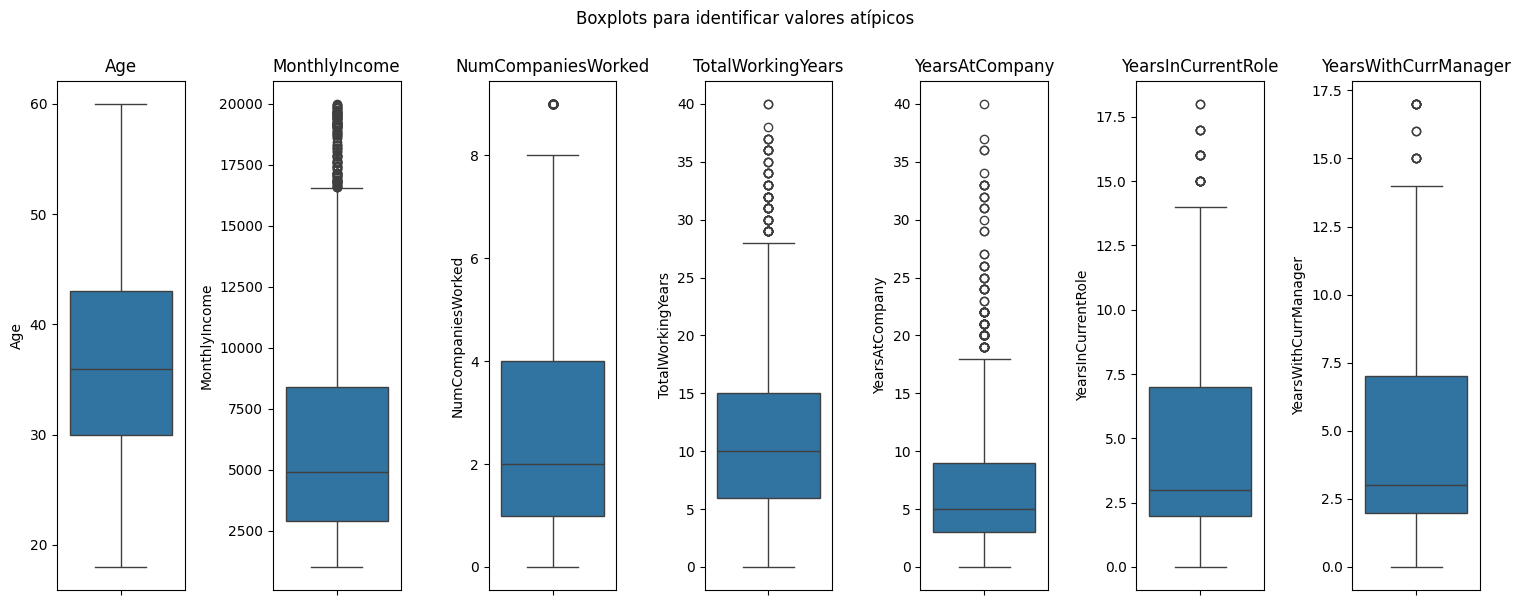

In [ ]:
#Armado de boxplots para identificación de valores atípicos
columnas_boxplots = ["Age", "MonthlyIncome", "NumCompaniesWorked", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager"]

fig, axes = plt.subplots(1, len(columnas_boxplots), figsize=(15, 6))

for ax, variable in zip(axes, columnas_boxplots):
    sns.boxplot(y=RRHH[variable], ax=ax)
    ax.set_title(variable)

plt.suptitle("Boxplots para identificar valores atípicos", y=1)
plt.tight_layout()
plt.show()


**A pesar de encontrar valores outliers en las columnas (exceptuando la que contiene edad), en principio resulta completamente lógico ya que se contemplan los datos de managers y directores. Tienen sueldos mucho más altos, suelen trabajar desde hace más tiempo (tanto dentro como fuera de la empresa) y una vez que obtienen el puesto, es dificil que lo modifiquen, así como su superior (CEO o dueño).**


In [ ]:
#Obtención de la cantidad de personal según su puesto de trabajo, solamente contemplando los outliers de cada columna
for column in ["MonthlyIncome", "NumCompaniesWorked", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager"]:
  q1 = np.percentile(RRHH[column], 25)
  q3 = np.percentile(RRHH[column], 75)
  iqr = q3 - q1
  limite_inferior = q1 - 1.5 * iqr
  limite_superior = q3 + 1.5 * iqr
  outliers = RRHH[(RRHH[column] < limite_inferior) | (RRHH[column] > limite_superior)]
  print(column)
  print(outliers.groupby("JobRole").size().sort_values(ascending=False))
  print("")

MonthlyIncome
JobRole
Manager              74
Research Director    40
dtype: int64

NumCompaniesWorked
JobRole
Research Scientist           11
Laboratory Technician         8
Research Director             8
Sales Executive               8
Manufacturing Director        6
Healthcare Representative     4
Human Resources               4
Manager                       3
dtype: int64

TotalWorkingYears
JobRole
Manager                      27
Research Director            17
Manufacturing Director        8
Healthcare Representative     6
Sales Executive               4
Laboratory Technician         1
dtype: int64

YearsAtCompany
JobRole
Manager                      43
Research Director            17
Sales Executive              16
Healthcare Representative    11
Manufacturing Director        8
Research Scientist            5
Laboratory Technician         3
Human Resources               1
dtype: int64

YearsInCurrentRole
JobRole
Research Director            8
Manager                      6
Sales

**Como ya se había inferido, se demuestra que la mayoria de outliers de las columnas pertenecen especialmente a managers y directores, exceptuando la que contiene la cantidad de empresas en las que se ha trabajado.**

In [ ]:
#Obtención de la cantidad de personal según edad, contemplando solamente outliers de la columna que contiene el número de empresas en las que se ha trabajado
q1_NCW = np.percentile(RRHH["NumCompaniesWorked"], 25)
q3_NCW= np.percentile(RRHH["NumCompaniesWorked"], 75)
iqr_NCW = q3_NCW - q1_NCW
limite_inferior_NCW = q1_NCW - 1.5 * iqr_NCW
limite_superior_NCW = q3_NCW + 1.5 * iqr_NCW
outliers_age = RRHH[(RRHH["NumCompaniesWorked"] < limite_inferior_NCW) | (RRHH["NumCompaniesWorked"] > limite_superior_NCW)]
print(outliers_age.groupby("Age").size().sort_index(ascending=True))

Age
24    1
27    2
29    4
30    3
31    3
32    1
34    3
35    3
36    4
38    2
39    2
40    3
42    2
43    1
44    2
45    2
46    1
47    1
48    1
49    1
50    1
51    1
52    2
54    2
56    2
58    1
59    1
dtype: int64


**En este caso, se reconoce que aquellos outliers pertencen especialmente a personas con edad igual o mayor a 24 años, lo cual resulta lógico. Sería extraño que un empleado haya obtenido experiencia en demasiadas empresas en una edad tan temprana.**

**Finalmente, la decisión será mantener los outliers, no quitarlos ni modificarlos, ya que se demostró que son datos completamente naturales y lógicos. Incluso, sería muy raro si no estuviesen, es decir, que no estaría correcto que no identifique como outliers, por ejemplo, los sueldos de directores y managers.**

Text(0.5, 1, 'Distribución de variables')

<Figure size 1500x1000 with 0 Axes>

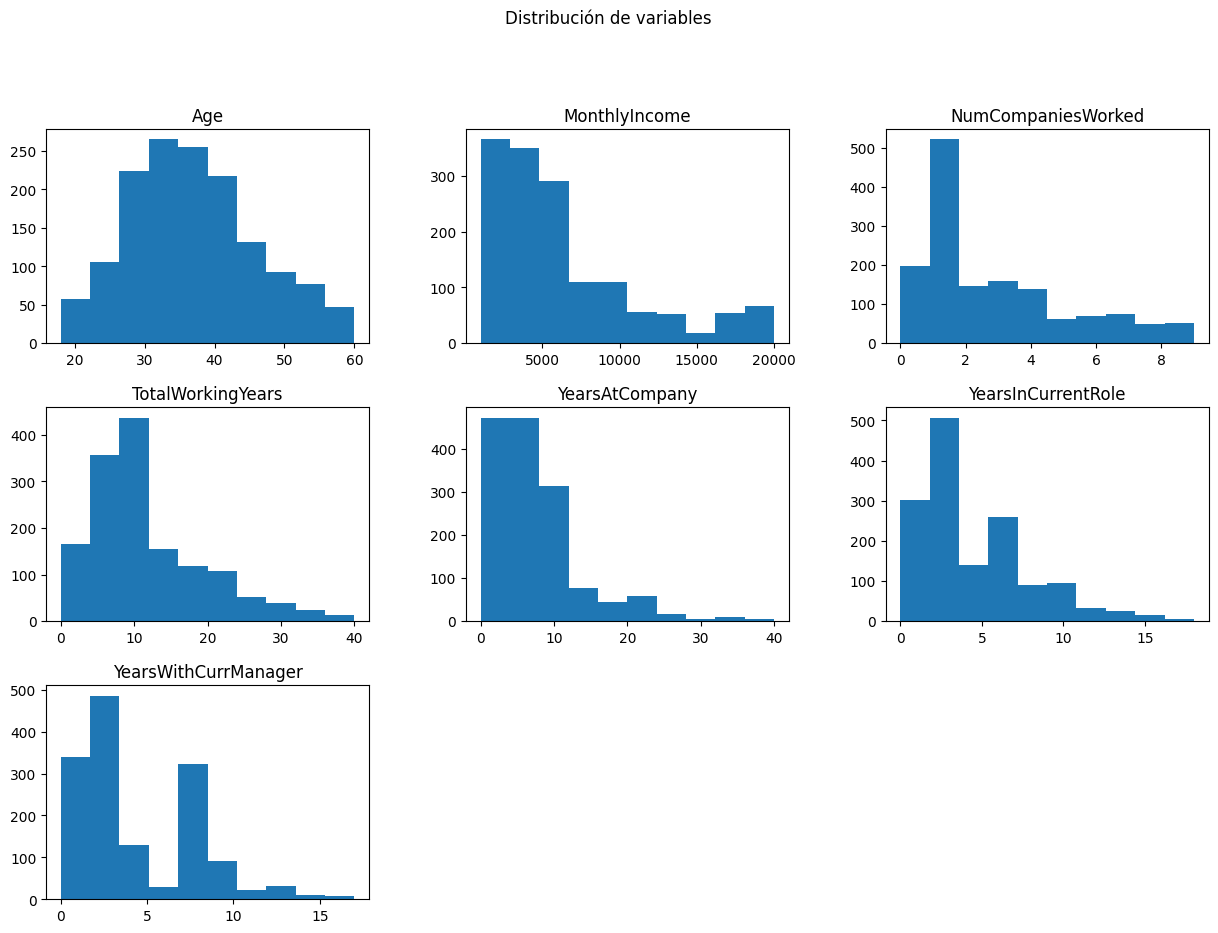

In [ ]:
#Elaboración de histogramas para observar distribuciones
plt.figure(figsize=(15,10))
RRHH.hist(figsize=(15,10), bins=10, grid=False)
plt.suptitle("Distribución de variables", y=1)

In [ ]:
#Obtención de distribución de forma analitica
for column in ["Age","MonthlyIncome", "NumCompaniesWorked", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager"]:
  print(column)
  print(stats.describe(RRHH[column]))
  print("")

Age
DescribeResult(nobs=1470, minmax=(18, 60), mean=36.923809523809524, variance=83.45504878602223, skewness=0.41286446154785084, kurtosis=-0.40685066033188644)

MonthlyIncome
DescribeResult(nobs=1470, minmax=(1009, 19999), mean=6502.931292517007, variance=22164857.07151841, skewness=1.3684185123330814, kurtosis=0.9977379294765711)

NumCompaniesWorked
DescribeResult(nobs=1470, minmax=(0, 9), mean=2.6931972789115646, variance=6.240048994410563, skewness=1.0254233954371303, kurtosis=0.006100250967981058)

TotalWorkingYears
DescribeResult(nobs=1470, minmax=(0, 40), mean=11.279591836734694, variance=60.54056348202997, skewness=1.11603155825941, kurtosis=0.9110702861207964)

YearsAtCompany
DescribeResult(nobs=1470, minmax=(0, 40), mean=7.0081632653061225, variance=37.534310443033576, skewness=1.7627284034822992, kurtosis=3.918056556094462)

YearsInCurrentRole
DescribeResult(nobs=1470, minmax=(0, 18), mean=4.229251700680272, variance=13.127121972001872, skewness=0.9164268059808774, kurtosis=

**Tanto visual como analiticamente, se reconoce como unicamente la columna de edades podría ser considerada con una distribución simétrica. El resto son asimétricas. La explicación a esto es idéntica a la de outliers, dentro del análisis se contempla a los directores y managers.**

#**DIFERENCIA DE SALARIOS DE LOS MANAGERS Y DIRECTORES ENTRE LOS GÉNEROS**

**Para analizar los salarios, la decisión fue reducir unicamente a aquellos puestos de managers y directores por dos motivos. El primero es que los cargos jerarquicos suelen ser en donde mayor desigualdad hay dentro de los empresas, mientras que el segundo se debe a que al ser una distribución tan asimétrica y con gran varianza, un análisis general no se considera muy representativo del caso.**

In [ ]:
#Filtración del dataset solamente con quienes son managers o directores
DIRECTOR_MANAGER = RRHH[(RRHH["JobRole"].str.contains("Director")) | (RRHH["JobRole"].str.contains("Manager"))]

#Armado del gráfico

fig = px.histogram(DIRECTOR_MANAGER, x="Gender", y="MonthlyIncome", color="Gender", histfunc="avg", text_auto=True)

fig.update_layout(
    title="Promedio de salario de directores y managers por género",
    title_x = 0.5,
    xaxis_title="Género",
    yaxis_title="Promedio de salario"
)

fig.show()

In [ ]:
#Clasificación según género
promedio_salarios_jerarquicos_mujeres = DIRECTOR_MANAGER[DIRECTOR_MANAGER["Gender"] == "Female"].MonthlyIncome
promedio_salarios_jerarquicos_hombres = DIRECTOR_MANAGER[DIRECTOR_MANAGER["Gender"] == "Male"].MonthlyIncome

#Realización de la operación
stats.ttest_ind(promedio_salarios_jerarquicos_mujeres, promedio_salarios_jerarquicos_hombres)

TtestResult(statistic=-1.5402888705768654, pvalue=0.12446300383197702, df=325.0)

**Entendiendo como cargos más jerarquicos a aquellos puestos de director o manager, se observa en el gráfico que si bien hay una diferencia beneficiando a los hombres en el promedio de los sueldos, luego de realizar el proceso estadistico se obtiene como resultado que no es significativa. Demuestra que la empresa se encarga de equilibrar correctamente los salarios entre los distintos generos en los cargos jerarquicos, que es donde mayor desigualdad suele haber en las compañias.**

#**CANTIDAD DE EMPLEADOS SEGÚN LA EDAD**

Text(0.5, 1.0, 'Cantidad de personal según edad')

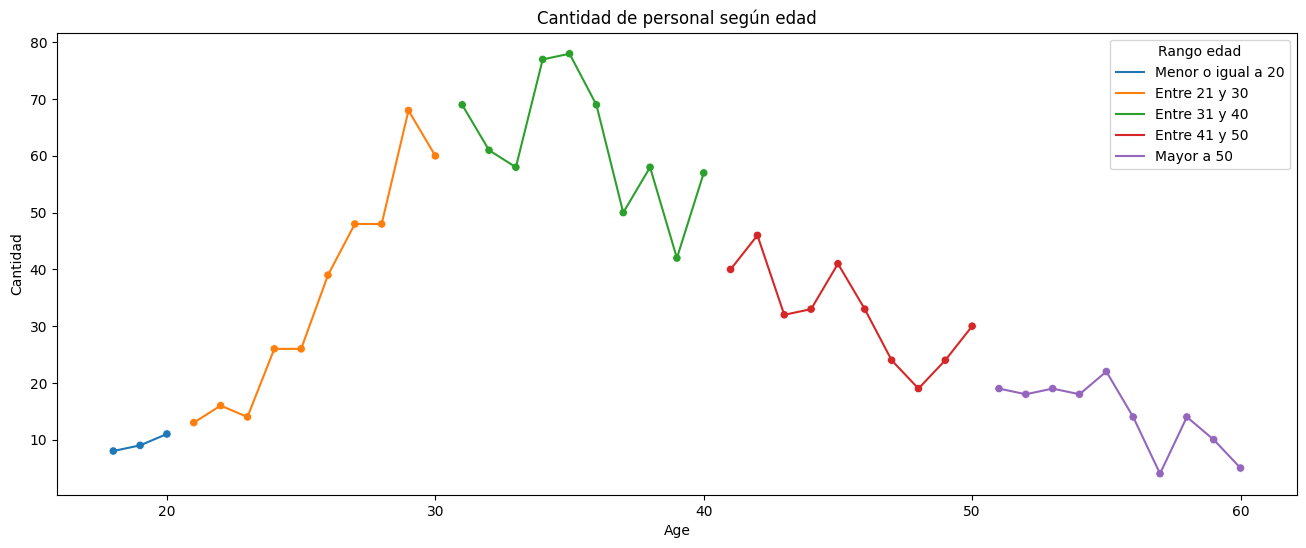

In [ ]:
#Agrupación de cantidad de personal según edad
cantidad_por_edad = RRHH.groupby(["Age"]).size().reset_index(name="Cantidad").set_index("Age")

#Armado de nueva columna, agrupando por rango de edades
cantidad_por_edad["Rango edad"] = pd.cut(x=cantidad_por_edad.index, bins=[0,20,30,40,50,99], labels=["Menor o igual a 20", "Entre 21 y 30",
                            "Entre 31 y 40", "Entre 41 y 50", "Mayor a 50"])

#Elaboración del gráfico
ax = plt.figure(figsize=(16,6))
sns.lineplot(x=cantidad_por_edad.index, y=cantidad_por_edad["Cantidad"], hue=cantidad_por_edad["Rango edad"])
sns.scatterplot(x=cantidad_por_edad.index, y=cantidad_por_edad["Cantidad"], marker="o", hue=cantidad_por_edad["Rango edad"], legend=False)
plt.title("Cantidad de personal según edad")

**Se encuentra que la mayor parte de los trabajadores pertenecen al grupo entre los 31 y 40 años. Por otro lado, los menores a 21 y mayores a 50 son las edades que menor personal tiene la empresa. Entendiendo que los menores son aquellos más relacionados con las nuevas tecnologias y las mayores los que más experiencia suelen tener, esto no parece ser una buena noticia. Se considera que debería presentarse una mayor diversificación.**

#**CANTIDAD DE AÑOS DE TRABAJO NECESARIOS PARA SER MANAGER**

In [ ]:
#Armado de un dataset solamente con las personas que están en el puesto o rol de manager
RRHH_MANAGERS = RRHH[RRHH["JobRole"] == "Manager"]

#Generación de una nueva columna con la resta de los años totales de trabajo con los que hace que trabaja como manager

RRHH_MANAGERS["Años trabajados para ser manager"] = RRHH_MANAGERS["TotalWorkingYears"] - RRHH_MANAGERS["YearsInCurrentRole"]

#Nuevamente generación de una nueva columna con la resta de los años de trabajo en la empresa y los que hace que trabaja como manager

RRHH_MANAGERS["Años trabajados en la empresa para ser manager"] = RRHH_MANAGERS["YearsAtCompany"] - RRHH_MANAGERS["YearsInCurrentRole"]

#Se calcula la cantidad de trabjadores según los años trabajados, tanto dentro como fuera de la empresa
AÑOS_TRABAJADOS_MANAGER = RRHH_MANAGERS["Años trabajados para ser manager"].value_counts().sort_index(ascending=True)

#Armado del DataFrame
DF_AÑOS_TRABAJADOS_MANAGER = pd.DataFrame({'Años trabajados': AÑOS_TRABAJADOS_MANAGER.index, "Cantidad de colaboradores": AÑOS_TRABAJADOS_MANAGER.values})

#Armado del grafico

fig = px.bar(DF_AÑOS_TRABAJADOS_MANAGER, x="Años trabajados", y="Cantidad de colaboradores", color="Cantidad de colaboradores", text_auto=True)

fig.update_layout(
    title="Cantidad de colaboradores según los años trabajados (dentro y fuera de la empresa) para ser manager",
    title_x = 0.5,
)

fig.show()

<ipython-input-62-e5fcbfd4ee26>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-e5fcbfd4ee26>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Se calcula la cantidad de managers según los años trabajados dentro de la empresa
AÑOS_TRABAJADOS_EMPRESA_MANAGER = RRHH_MANAGERS["Años trabajados en la empresa para ser manager"].value_counts().sort_index(ascending=True)

#Armado del DataFrame
DF_AÑOS_TRABAJADOS_MANAGER = pd.DataFrame({'Años trabajados en la empresa': AÑOS_TRABAJADOS_EMPRESA_MANAGER.index, 'Cantidad de colaboradores': AÑOS_TRABAJADOS_EMPRESA_MANAGER.values})

#Armado del grafico

fig = px.bar(DF_AÑOS_TRABAJADOS_MANAGER, x="Años trabajados en la empresa", y="Cantidad de colaboradores", color="Cantidad de colaboradores",text_auto=True)

fig.update_layout(
    title="Cantidad de colaboradores según los años trabajados dentro de la empresa para ser manager",
    title_x = 0.5,
)

fig.show()

**A partir del análisis de ambos gráficos, se observa que usualmente se requiere entre 12 y 28 años de trabajo (tanto dentro como fuera de la empresa) para poder ser manager, obviamente hay una gran amplitud porque depende de muchos factores. Por otro lado, gran parte de los managers que tiene la empresa tardan como mucho 5 años en serlo trabajando en ella, incluso algunos siendo contratados especialmente para eso. Por lo tanto, la conclusión es que son pocos los trabajadores que tienen el puesto de managers habiendo trabajado mucho tiempo en la compañia. Esto se considera bastante negativo para la empresa, ya que podría llegar a desmotivar a los colaboradores que se encuentran en los rangos más bajos jerarquicamente hablando, entendiendo que se dificulta mucho su llegada a los puestos mayores.**

#**POSIBILIDAD DE OBTENER EL PRIMER EMPLEO EN LA EMPRESA**

In [ ]:
#Filtración del DataFrame obteniendo quienes son los colaboradores que no trabajaron en otras empresas antes de hacerlo en la actual
PRIMER_TRABAJO = RRHH[RRHH["NumCompaniesWorked"] == 0]

#Se agrega una nueva columna para saber a que edad fue contratado el trabajador
PRIMER_TRABAJO["EDAD QUE TENÍA CUANDO FUE CONTRATADO"] = PRIMER_TRABAJO["Age"] - PRIMER_TRABAJO["YearsAtCompany"]

#A partir de condiciones, se genera una nueva columna para el DataFrame diferenciando en 4 grupos de edades
AGRUPACION_POR_EDAD_CONTRATACION = [
    PRIMER_TRABAJO["EDAD QUE TENÍA CUANDO FUE CONTRATADO"] <= 20,
    (PRIMER_TRABAJO["EDAD QUE TENÍA CUANDO FUE CONTRATADO"] >= 21) & (PRIMER_TRABAJO["EDAD QUE TENÍA CUANDO FUE CONTRATADO"] <= 25),
    (PRIMER_TRABAJO["EDAD QUE TENÍA CUANDO FUE CONTRATADO"] >= 26) & (PRIMER_TRABAJO["EDAD QUE TENÍA CUANDO FUE CONTRATADO"] <= 30),
    PRIMER_TRABAJO["EDAD QUE TENÍA CUANDO FUE CONTRATADO"] >= 31
]

VALORES_EDAD = ["Menor o igual a 20","Entre 21 y 25", "Entre 26 y 30", "Mayor o igual a 31"]

PRIMER_TRABAJO["AGRUPACIÓN POR EDAD QUE TENÍA CUANDO FUE CONTRATADO"] = np.select(AGRUPACION_POR_EDAD_CONTRATACION, VALORES_EDAD)

#Obtención de la cantidad de trabajadores de cada grupo
CANTIDAD_POR_EDAD_PRIMER_TRABAJO = PRIMER_TRABAJO["AGRUPACIÓN POR EDAD QUE TENÍA CUANDO FUE CONTRATADO"].value_counts().reset_index()

CANTIDAD_POR_EDAD_PRIMER_TRABAJO.columns = ["Edad", "Cantidad de trabajadores"]

# Creación del gráfico
fig = px.pie(CANTIDAD_POR_EDAD_PRIMER_TRABAJO, names = "Edad", values='Cantidad de trabajadores',
             title='Edad que tenìan los trabajadores que fueron contratados sin experiencia', color="Edad")

fig.update_layout(title_x=0.5)

fig.update_traces(textposition="inside", textinfo="percent+label")

**Se obtiene la información de que la mayoria de trabajadores que ingresaron a la empresa sin tener experiencia previamante lo hicieron cuando tenian entre 21 y 25 años. Esto resulta positivo, aunque sería aún mejor que sea mayor el porcentaje de colaboradores cuya edad era 20 o menos. Esto relaciona a uno de los análisis previos en donde se observó que la empresa tiene actualmente pocas personas de estas edades. Junto con este nuevo gráfico, se concluye que a lo largo de los años la empresa mantuvo una politica de selección y contratación de personal similar.**

#**ROTACIÓN DE ROL Y SUPERVISOR**

**Al no tener la información de todas las rotaciones del personal dentro de la empresa, solamente se toma como referencia aquellas personas que con el dataset, se sabe si rotaron o se mantuvieron en sus puestos y/o supervisor, "jefe" o superior. Se toman los ultimos 3 años, ya que a partir de ese numero, según el criterio utilizado, la rotación no estaría mal en una empresa, a pesar de que obviamente influyen muchos factores, pero es el parametro considerado adecuado.**

In [ ]:
#Filtración del DataFrame para obtener solo quienes tengan menos de 4 años en la empresa
menos_4_años_empresa= RRHH[RRHH["YearsAtCompany"] < 4]

#Nuevamente filtración para saber quienes tienen el mismo rol y supervisor/jefe/superior desde que ingresaron a la empresa
mismo_rol_y_supervisor = menos_4_años_empresa[(menos_4_años_empresa["YearsInCurrentRole"] == menos_4_años_empresa["YearsWithCurrManager"]) & (menos_4_años_empresa["YearsInCurrentRole"] == menos_4_años_empresa["YearsAtCompany"])]

#Obtención de la cantidad de trabajadores
cantidad_mismo_rol_y_supervisor = len(mismo_rol_y_supervisor)

#Obtención de la cantidad de trabajadores que no tienen el mismo rol y/o supervisor/jefe/superior desde que ingresaron a la empresa
cantiad_distinto_rol_y_supervisor = len(menos_4_años_empresa) - len(mismo_rol_y_supervisor)

#Armado de DataFrame con la información obtenida
df_cantidades_menos_4_años_empresa = pd.DataFrame({"Supervisor":["Mantuvo supervisor y rol", "No mantuvo supervisor y/o rol"], "Cantidad": [cantidad_mismo_rol_y_supervisor, cantiad_distinto_rol_y_supervisor] })

#Armado de gráfico
fig = px.bar(df_cantidades_menos_4_años_empresa, x="Supervisor", y="Cantidad", color="Supervisor", text_auto=True)

fig.update_layout(
    title="Cantidad de colaboradores dependiendo de si mantuvieron supervisor y rol, considerando a quienes ingresaron hace menos de 4 años",
    title_x = 0.5,
    yaxis_title = "Cantidad de colaboradores",
    xaxis_title = "Situación de rotación"
)

#Muestra de gráfico
fig.show()

**Con respecto al gráfico, se demuestra que la mayor parte de los nuevos contratados rotaron de rol y/o supervisor. Esto claramente es negativo porque explica que continuamente se realizan modificaciones, que genera demoras por capacitación del personal, relacionamiento con sus nuevos compañeros de trabajo, entender la importancia de su nueva labor en la compañia, entre muchos otros.**